# Three dimensional skyrmion structure

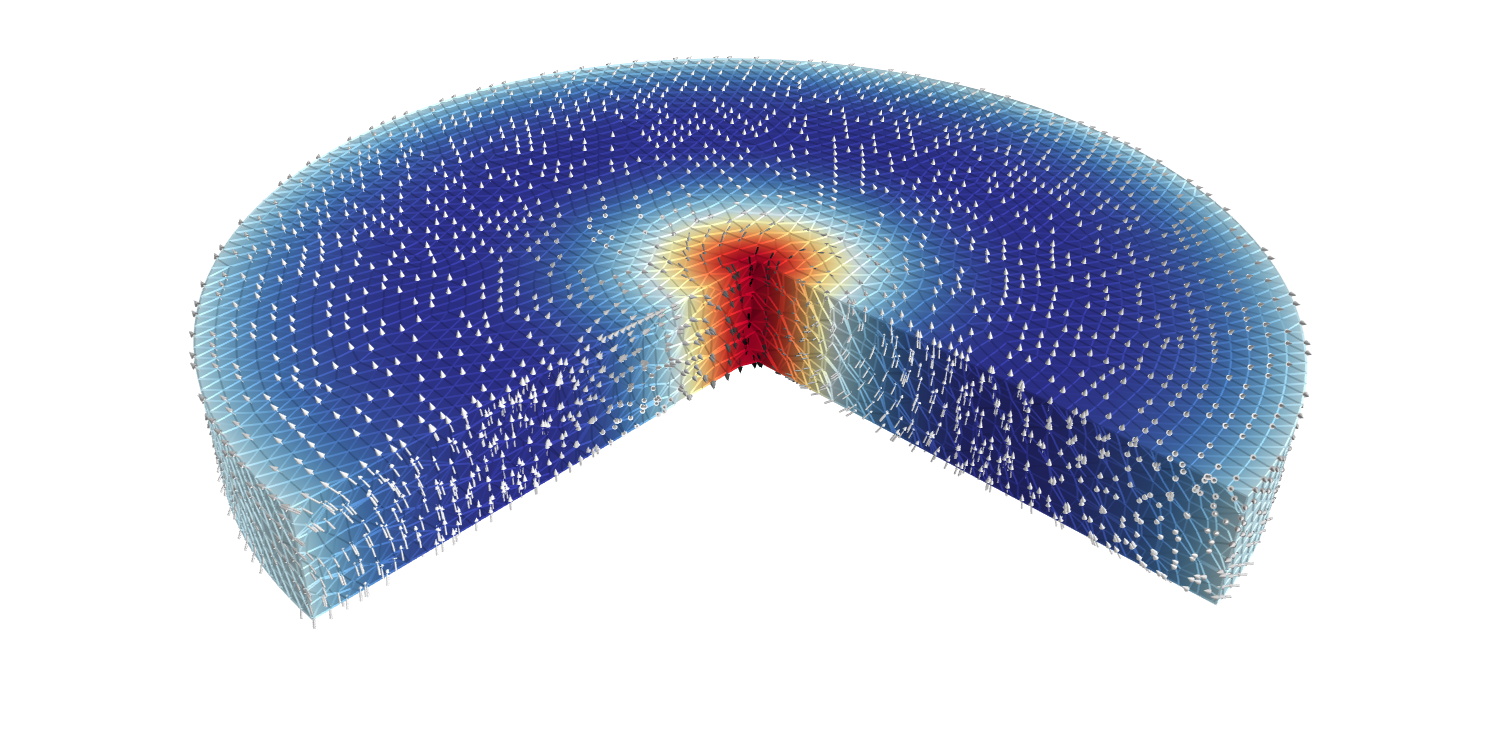

In [1]:
from IPython.display import Image
Image("mayavi/system_3d_cylinder_finmag.png")

Three dimensional standard problem for the *Proposal for a micromagnetic standard problem for materials with Dzyaloshinskii-Moriya interaction* paper.

System:


    * An FeGe cylinder of 180 nm diameter and 20 nm thickness (along z direction)
    * Interactions: Exchange:                    8.78e-12  J m**-1
                    DMI:                         1.58e-3   J m**-2
                    Saturation Magnetisation:    3.84e5    A m**-1
                    

Here we observe a helical rotation along the thickness of the sample, which modifies the skyrmionic structure in every layer.

Results from this notebook were obtained with finite element codes.

Relevant paper:

[x] Three-dimensional skyrmion states in thin films of cubic helimagnets. PRB **87**, 094424 (2013).

# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import scipy.optimize
import scipy.integrate
import scipy.interpolate

import pandas as pd

import os, glob

%matplotlib inline

In [3]:
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
plt.style.use('lato_style.mplstyle')

# Material

In [4]:
# System parameters for the finite difference simulations
# Since we use a 3x3x2 nm^3 cell, we use a slightly larger sample size to get
# the right sample dimensions

# Scale in nm
side_length_s = 183 
thickness_s = 22
cell_s = 3
cellz_s = 2

# scales in m
nm = 1e-9
side_length = side_length_s * nm
thickness = thickness_s * nm
cell = cell_s * nm
cellz = cellz_s * nm

# Bulk
A = 8.78e-12
D = 1.58e-3
Ms = 3.84e5
B = 0.4

initial_sk_diam = 20

Relevant parameters: Helix period $L_{D}$ and saturation field $H_{D}$

$$L_{D} = \frac{4\pi A}{|D|} \qquad H_{D}=\frac{D^{2}}{2 A M_{\text{s}}}$$

In [5]:
L_D = 4 * np.pi * A / D
H_D = (D ** 2) / (2 * A * Ms)

print('L_D =', L_D * 1e9, 'nm')
print('mu0 H_D =', H_D, 'T')

print('thickness / L_D = ', thickness / L_D)
print('H / H_D = ', B / H_D)

L_D = 69.83084430004654 nm
mu0 H_D = 0.3702187737281701 T
thickness / L_D =  0.31504702858054
H / H_D =  1.0804422368210223


# Finmag Simulation

Information about the finite-element mesh:

       ===== Distribution of edge lengths: ===========
    1.132 
    1.317 
    1.503 *
    1.688 *********
    1.874 ****************************
    2.059 *****************************************************************
    2.244 **********************************************************************
    2.430 ******************************************************************
    2.615 ************************************************************
    2.800 *************************************************
    2.986 **********************************
    3.171 ********************
    3.356 **********
    3.542 ****
    3.727 **
    3.913 *
    4.098 
    4.283 
    4.469 
    4.654 
    4.839 


In [9]:
m_bottom = np.loadtxt('../sims/finmag/3D/m_bottom.dat')
m_top = np.loadtxt('../sims/finmag/3D/m_top.dat')
m_center = np.loadtxt('../sims/finmag/3D/m_center.dat')

No handles with labels found to put in legend.


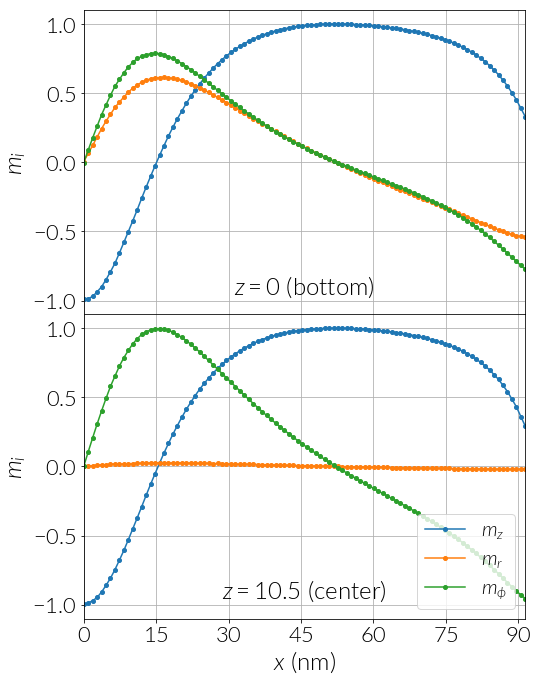

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(8, 16 / 1.6))

# -----------------------------------------------------------------------------
ax1.plot(m_bottom[:, 0], m_bottom[:, 5], 'o-', label=r'$m_{z}$', ms=4)
ax1.plot(m_bottom[:, 0], m_bottom[:, 6], 'o-', label=r'$m_{r}$', ms=4)
ax1.plot(m_bottom[:, 0], m_bottom[:, 7], 'o-', label=r'$m_{\phi}$', ms=4)

ax1.grid()
plt.legend(loc=4)
ax1.set_xlim(0, 91.5)
ax1.set_ylim(-1.1, 1.1)

ax1.set_xlabel(r'$x$ (nm)')
ax1.set_ylabel(r'$m_{i}$')

ax1.text(0.5, 0.05, r'$z=$' + '{} (bottom)'.format(0),
         horizontalalignment='center', verticalalignment='bottom', 
         transform=ax1.transAxes)

# -----------------------------------------------------------------------------
ax2.plot(m_center[:, 0], m_center[:, 5], 'o-', label=r'$m_{z}$', ms=4)
ax2.plot(m_center[:, 0], m_center[:, 6], 'o-', label=r'$m_{r}$', ms=4)
ax2.plot(m_center[:, 0], m_center[:, 7], 'o-', label=r'$m_{\phi}$', ms=4)

ax2.grid()
ax2.legend(loc=4)
# ax2.set_xlim(0, 75)
ax2.set_ylim(-1.1, 1.1)

ax2.set_xlabel(r'$x$ (nm)')
ax2.set_ylabel(r'$m_{i}$')

ax2.text(0.5, 0.05, r'$z=$' + '{} (center)'.format(10.5),
         horizontalalignment='center', verticalalignment='bottom', 
         transform=ax2.transAxes)

# ax2.set_xticklabels([])
ax2.set_xticks([15 * i for i in range(7)])

# -----------------------------------------------------------------------------

plt.tight_layout()
plt.subplots_adjust(hspace=0)

plt.savefig('../paper/result_3d_cylinder_finmag.pdf', bbox_inches='tight')

The skyrmion radius at different slices, obtained from the Finmag simulation:
    
    At z = 0.0  , r_sk = 15.098
    At z = 2.1  , r_sk = 15.167
    At z = 4.2  , r_sk = 15.231
    At z = 6.3  , r_sk = 15.302
    At z = 8.4  , r_sk = 15.383
    At z = 10.5 , r_sk = 15.416
    At z = 12.6 , r_sk = 15.380
    At z = 14.7 , r_sk = 15.334
    At z = 16.8 , r_sk = 15.269
    At z = 18.9 , r_sk = 15.197
    At z = 21.0 , r_sk = 15.118

We can export the data from the figure:

In [15]:
!mkdir -p data/results_3d_cylinder_finmag/

In [16]:
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mz_bottom_finmag.txt', np.column_stack((m_bottom[:, 0], m_bottom[:, 5])))
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mr_bottom_finmag.txt', np.column_stack((m_bottom[:, 0], m_bottom[:, 6])))
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mphi_bottom_finmag.txt', np.column_stack((m_bottom[:, 0], m_bottom[:, 7])))

np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mz_center_finmag.txt', np.column_stack((m_center[:, 0], m_center[:, 5])))
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mr_center_finmag.txt', np.column_stack((m_center[:, 0], m_center[:, 6])))
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mphi_center_finmag.txt', np.column_stack((m_center[:, 0], m_center[:, 7])))

np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mz_top_finmag.txt', np.column_stack((m_top[:, 0], m_top[:, 5])))
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mr_top_finmag.txt', np.column_stack((m_top[:, 0], m_top[:, 6])))
np.savetxt('data/results_3d_cylinder_finmag/result_3d_cylinder_x-mphi_top_finmag.txt', np.column_stack((m_top[:, 0], m_top[:, 7])))

# R. Hertel simulation

Here we load the data from R. Hertel finite element code for the 3D cylinder without Demagnetising field:

In [17]:
# Old data for a 90 nm wide and 20 nm thick cylinder:
# m_bottom_RH = np.loadtxt('data/results_3d_cylinder_RHertel/radialLineAlongXatZm10.csv', skiprows=1, delimiter=',')
# m_top_RH = np.loadtxt('data/results_3d_cylinder_RHertel/radialLineAlongXatZp10.csv', skiprows=1, delimiter=',')
# m_center_RH = np.loadtxt('data/results_3d_cylinder_RHertel/radialLineAlongXatZ0.csv', skiprows=1, delimiter=',')

In [ ]:
# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(8, 16 / 1.6))

# # -----------------------------------------------------------------------------

# ax1.plot(m_bottom_RH[:, 0] * 100, m_bottom_RH[:, 5], '-', label=r'$m_{z}$', lw=3)
# ax1.plot(m_bottom_RH[:, 0] * 100, m_bottom_RH[:, 3], '-', label=r'$m_{r}$', lw=3)
# ax1.plot(m_bottom_RH[:, 0] * 100, m_bottom_RH[:, 4], '-', label=r'$m_{\phi}$', lw=3)

# # ax1.axvline(x=r_sk_F, color='k', lw=1, ls='--')

# ax1.grid()
# plt.legend(loc=4)
# # ax1.set_ylim(-1.1, 1.1)

# ax1.set_xlabel(r'$x$ (nm)')
# ax1.set_ylabel(r'$m_{i}$')

# ax1.text(0.5, 0.05, r'$z=$' + '{} (bottom)'.format(-10),
#          horizontalalignment='center', verticalalignment='bottom', 
#          transform=ax1.transAxes)

# # -----------------------------------------------------------------------------

# ax2.plot(m_center_RH[:, 0] * 100, m_center_RH[:, 5], '-', label=r'$m_{z}$', lw=3)
# ax2.plot(m_center_RH[:, 0] * 100, m_center_RH[:, 3], '-', label=r'$m_{r}$', lw=3)
# ax2.plot(m_center_RH[:, 0] * 100, m_center_RH[:, 4], '-', label=r'$m_{\phi}$', lw=3)

# ax2.grid()
# ax2.legend(loc=4)
# ax2.set_xlabel(r'$x$ (nm)')
# ax2.set_ylabel(r'$m_{i}$')

# ax2.text(0.5, 0.05, r'$z=$' + '{} (center)'.format(0),
#          horizontalalignment='center', verticalalignment='bottom', 
#          transform=ax2.transAxes)

# # -----------------------------------------------------------------------------

# plt.tight_layout()
# plt.subplots_adjust(hspace=0)

# # plt.savefig('../paper/result_3d_cylinder_RHertel.pdf', bbox_inches='tight')

# Comparison

A comparison between the results obtained with Finmag and R. Hertel's code for the magnetisation at the bottom surface of the cylinder:

In [24]:
data_RH = np.loadtxt('data/results_3d_cylinder_RHertel/RadialScanOnTheBottom.csv', skiprows=1, delimiter=',')

In [28]:
mx_RH, my_RH, mz_RH = data_RH[:, 3],data_RH[:, 4], data_RH[:, 5] 
phi_RH = np.arctan2(data_RH[:, 1], data_RH[:, 0])

mphi_RH = (-mx_RH * np.sin(phi_RH) + my_RH * np.cos(phi_RH))
mr_RH = (mx_RH * np.cos(phi_RH) + my_RH * np.sin(phi_RH))

# Save the coordinates and magnetisation components in the m_bottom_RH array:
# columns: x y z mr mphi mz
m_bottom_RH = np.zeros((len(data_RH[:, 0]), 6))
m_bottom_RH[:, 0], m_bottom_RH[:, 1], m_bottom_RH[:, 2] = data_RH[:, 0], data_RH[:, 1], data_RH[:, 2]
m_bottom_RH[:, 3], m_bottom_RH[:, 4], m_bottom_RH[:, 5] = mr_RH, mphi_RH, mz_RH

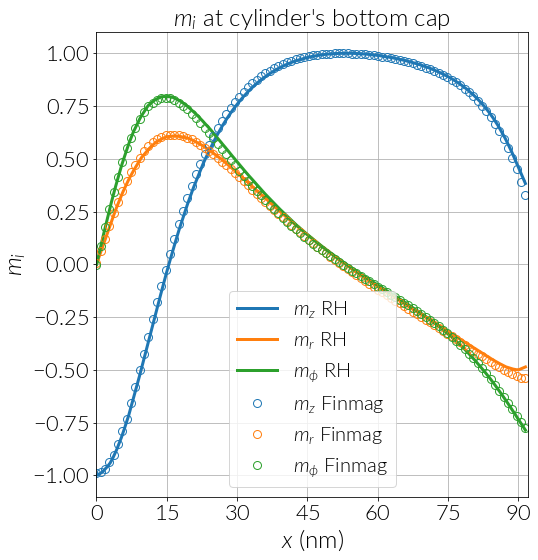

In [33]:
fig, ax1 = plt.subplots(nrows=1, figsize=(8, 8))

# -----------------------------------------------------------------------------

ax1.plot(m_bottom_RH[:, 0], m_bottom_RH[:, 5], '-', label=r'$m_{z}$ RH', lw=3)
ax1.plot(m_bottom_RH[:, 0], m_bottom_RH[:, 3], '-', label=r'$m_{r}$ RH', lw=3)
ax1.plot(m_bottom_RH[:, 0], m_bottom_RH[:, 4], '-', label=r'$m_{\phi}$ RH', lw=3)

ax1.plot(m_bottom[:, 0], m_bottom[:, 5], 'oC0', label=r'$m_{z}$ Finmag', ms=8, markerfacecolor='None')
ax1.plot(m_bottom[:, 0], m_bottom[:, 6], 'oC1', label=r'$m_{r}$ Finmag', ms=8, markerfacecolor='None')
ax1.plot(m_bottom[:, 0], m_bottom[:, 7], 'oC2', label=r'$m_{\phi}$ Finmag', ms=8, markerfacecolor='None')

# ax1.plot(m_bottom_RH[:, 0], m_bottom_RH[:, 6], 'o-', label=r'$m_{r}$')
# ax1.plot(m_bottom_RH[:, 0], m_bottom_RH[:, 7], 'o-', label=r'$m_{\phi}$')

# ax1.axvline(x=r_sk_F, color='k', lw=1, ls='--')

ax1.grid()
plt.legend(loc=0)
ax1.set_xlim(0, 92)
# ax1.set_ylim(-1.1, 1.1)
ax1.set_xticks([15 * i for i in range(7)])

ax1.set_xlabel(r'$x$ (nm)')
ax1.set_ylabel(r'$m_{i}$')

ax1.text(0.5, 1.0, r"$m_{i}$ at cylinder's bottom cap",
         horizontalalignment='center', verticalalignment='bottom', 
         transform=ax1.transAxes)

plt.tight_layout()

plt.savefig('../paper/result_3d_cylinder_Finmag-RHertel_comparison.pdf', bbox_inches='tight')